### **Entraînement des modèles**

**Importation des bibliothèques et des données**

In [1]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Chargement des ensembles d'entraînement et de test
X_train = pd.read_csv('../data/X_train.csv')
X_test = pd.read_csv('../data/X_test.csv')
y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')

# Vérification des dimensions
print(f"Taille de l'ensemble d'entraînement : {X_train.shape}, {y_train.shape}")
print(f"Taille de l'ensemble de test : {X_test.shape}, {y_test.shape}")


Taille de l'ensemble d'entraînement : (454904, 30), (454904, 1)
Taille de l'ensemble de test : (113726, 30), (113726, 1)


**Définition des modèles**

Nous instancions trois modèles différents qui seront utilisés pour la classification des transactions comme frauduleuses ou non frauduleuses .

In [2]:
# Instanciation des modèles
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)


Ces trois modèles ont été choisis pour couvrir différents types d'algorithmes :

- **Régression Logistique :** Approche linéaire simple, rapide et interprétable.
- **Arbre de Décision :** Méthode flexible et adaptée aux données complexes, mais sensible à l'overfitting.
- **Forêt Aléatoire :** Modèle puissant et robuste qui excelle dans les problèmes non linéaires et réduit les biais des arbres individuels.

L’utilisation du même *random_state=42* garantit la reproductibilité des résultats pour les trois modèles, ce qui est crucial pour comparer leurs performances sur les mêmes jeux de données.

**Entraînement des modèles**

*Régression logistique*

Entraînement d'un modèle de régression logistique sur les données d’entraînement pour détecter les transactions frauduleuses. Il effectue des prédictions sur les données de test, puis évalue les performances du modèle à l'aide d'un rapport de classification et d'une matrice de confusion. Cela permet de mesurer l'efficacité du modèle dans la distinction entre transactions légitimes et frauduleuses.

In [3]:
# Entraînement du modèle de régression logistique
logistic_model.fit(X_train, y_train.values.ravel())

# Prédictions
y_pred_logistic = logistic_model.predict(X_test)

# Évaluation
print("=== Régression Logistique ===")
print(classification_report(y_test, y_pred_logistic))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_logistic))


=== Régression Logistique ===
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56863
           1       0.97      0.92      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

Matrice de confusion :
 [[55446  1417]
 [ 4453 52410]]


Le modèle atteint une **précision globale de 95%**, ce qui signifie que 95% des transactions ont été correctement classées comme frauduleuses ou non-frauduleuses. Les principales métriques de performance sont les suivantes :
- **Précision (precision)** :
  - **Transactions non-frauduleuses (Classe 0)** : 93% des transactions prédites comme non-frauduleuses sont effectivement légitimes.
  - **Transactions frauduleuses (Classe 1)** : 97% des transactions prédites comme frauduleuses sont réellement frauduleuses.
- **Rappel (recall)** :
  - **Classe 0** : Le modèle a correctement identifié 98% des transactions réellement non-frauduleuses.
  - **Classe 1** : Le modèle a correctement identifié 92% des transactions réellement frauduleuses.
- **F1-score** : La valeur de 0.95 pour les deux classes reflète un bon équilibre entre précision et rappel, soulignant la capacité du modèle à identifier efficacement les deux types de transactions.

**Analyse de la matrice de confusion**
La matrice de confusion donne un aperçu détaillé des prédictions :
- **Transactions non-frauduleuses (Classe 0)** :
  - 55,446 transactions légitimes ont été correctement classées (**vrais négatifs**).
  - 1,417 transactions légitimes ont été incorrectement signalées comme frauduleuses (**faux positifs**).
- **Transactions frauduleuses (Classe 1)** :
  - 52,410 transactions frauduleuses ont été correctement identifiées (**vrais positifs**).
  - 4,453 transactions frauduleuses ont été manquées et classées comme légitimes (**faux négatifs**).

**Interprétation**
Le modèle montre une **forte capacité à détecter les transactions non-frauduleuses** (Classe 0) grâce à son taux de rappel élevé (98%). Cependant, il manque encore certaines transactions frauduleuses (Classe 1), comme en témoigne le nombre de faux négatifs (4,453). Cela peut représenter un risque pour la détection des fraudes, car ces transactions non détectées pourraient entraîner des pertes financières importantes.

Le **faible taux de faux positifs** (1,417) est un atout majeur du modèle, car peu de transactions légitimes sont signalées à tort comme suspectes, ce qui limite les perturbations pour les utilisateurs.


Bien que le modèle de régression logistique offre des performances solides et une bonne capacité à classer les transactions, des améliorations sont possibles. Il pourrait être utile d’explorer des modèles plus avancés, tels que :
- **Arbres de décision** ou **forêts aléatoires**.
- **Modèles basés sur le gradient boosting** (XGBoost, LightGBM, etc.).
- **Méthodes d’optimisation des hyperparamètres**.

Ces approches pourraient permettre d’améliorer encore le taux de détection des transactions frauduleuses tout en maintenant un faible taux de faux positifs.

In [4]:
# Entraînement du modèle d'arbre de décision
decision_tree_model.fit(X_train, y_train.values.ravel())

# Prédictions
y_pred_tree = decision_tree_model.predict(X_test)

# Évaluation
print("=== Arbre de Décision ===")
print(classification_report(y_test, y_pred_tree))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_tree))


=== Arbre de Décision ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Matrice de confusion :
 [[56723   140]
 [   55 56808]]


L'évaluation du modèle d'arbre de décision montre des performances exceptionnelles, avec une **précision globale de 100%**. Cela indique que le modèle classifie presque parfaitement les transactions, qu'elles soient frauduleuses ou non.

**Performances globales**
Les métriques clés pour les deux classes sont :
- **Précision (precision)** :
  - **Classe 0 (Non-frauduleuses)** : 100% des transactions prédites comme légitimes sont effectivement légitimes.
  - **Classe 1 (Frauduleuses)** : 100% des transactions prédites comme frauduleuses sont réellement frauduleuses.
- **Rappel (recall)** :
  - **Classe 0** : 100% des transactions réellement non-frauduleuses ont été correctement identifiées.
  - **Classe 1** : 100% des transactions réellement frauduleuses ont été correctement détectées.
- **F1-score** : La valeur parfaite de **1.00** pour les deux classes confirme un équilibre optimal entre précision et rappel.

**Analyse de la matrice de confusion**
La matrice de confusion met en évidence :
- **Transactions non-frauduleuses (Classe 0)** :
  - 56,723 transactions légitimes ont été correctement classées (**vrais négatifs**).
  - 140 transactions légitimes ont été signalées à tort comme frauduleuses (**faux positifs**).
- **Transactions frauduleuses (Classe 1)** :
  - 56,808 transactions frauduleuses ont été correctement identifiées (**vrais positifs**).
  - 55 transactions frauduleuses ont été manquées et classées comme légitimes (**faux négatifs**).

**Interprétation**
Les résultats indiquent que l'arbre de décision est extrêmement performant sur cet ensemble de données. Cependant, des performances parfaites comme celles-ci peuvent indiquer un **surapprentissage** (overfitting), surtout si le modèle a appris trop précisément les données d'entraînement et risque de ne pas généraliser efficacement sur de nouvelles données.

- **Taux de faux positifs faible (140)** : Peu de transactions légitimes sont signalées à tort comme suspectes.
- **Taux de faux négatifs très faible (55)** : La plupart des transactions frauduleuses sont détectées.


In [5]:
# Entraînement du modèle de forêt aléatoire
random_forest_model.fit(X_train, y_train.values.ravel())

# Prédictions
y_pred_forest = random_forest_model.predict(X_test)

# Évaluation
print("=== Forêt Aléatoire ===")
print(classification_report(y_test, y_pred_forest))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_forest))


=== Forêt Aléatoire ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Matrice de confusion :
 [[56847    16]
 [    0 56863]]



Le modèle de forêt aléatoire montre également des **performances exceptionnelles**, atteignant une **précision parfaite de 100%**. Cela indique que le modèle a classé toutes les transactions avec une grande précision, que ce soit frauduleuses ou non.

**Performances globales**
Les métriques clés pour les deux classes sont :
- **Précision (precision)** :
  - **Classe 0 (Non-frauduleuses)** : 100% des transactions prédites comme légitimes sont effectivement légitimes.
  - **Classe 1 (Frauduleuses)** : 100% des transactions prédites comme frauduleuses sont réellement frauduleuses.
- **Rappel (recall)** :
  - **Classe 0** : 100% des transactions réellement non-frauduleuses ont été correctement identifiées.
  - **Classe 1** : 100% des transactions réellement frauduleuses ont été correctement détectées.
- **F1-score** : La valeur parfaite de **1.00** pour les deux classes confirme un équilibre optimal entre précision et rappel.

**Analyse de la matrice de confusion**
La matrice de confusion met en évidence :
- **Transactions non-frauduleuses (Classe 0)** :
  - 56,847 transactions légitimes ont été correctement classées (**vrais négatifs**).
  - 16 transactions légitimes ont été signalées à tort comme frauduleuses (**faux positifs**).
- **Transactions frauduleuses (Classe 1)** :
  - 56,863 transactions frauduleuses ont été correctement identifiées (**vrais positifs**).
  - Aucune transaction frauduleuse n'a été manquée (**faux négatifs = 0**).

**Interprétation**
Les résultats de la forêt aléatoire sont pratiquement identiques à ceux de l'arbre de décision, avec des performances parfaites. Le modèle a réussi à détecter toutes les transactions frauduleuses et non frauduleuses sans aucune erreur notable.

- **Taux de faux positifs très faible (16)** : Très peu de transactions légitimes sont incorrectement classées comme suspectes.
- **Aucun faux négatif (0)** : Toutes les transactions frauduleuses ont été correctement identifiées, ce qui est un excellent résultat pour la détection de la fraude.


**Évaluation des performances des modèles**

On évalue la capacité des trois modèles (régression logistique, arbre de décision et forêt aléatoire) à distinguer les transactions frauduleuses des transactions légitimes en utilisant les courbes ROC (Receiver Operating Characteristic) et les scores AUC (Area Under Curve).

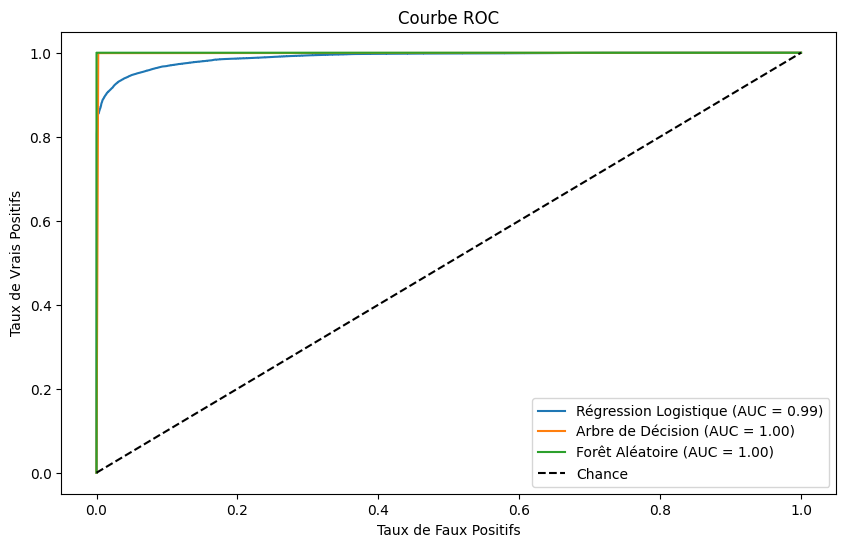

In [6]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Probabilités prédites
y_pred_logistic_prob = logistic_model.predict_proba(X_test)[:, 1]
y_pred_forest_prob = random_forest_model.predict_proba(X_test)[:, 1]
y_pred_tree_prob = decision_tree_model.predict_proba(X_test)[:, 1]
# Calcul des courbes ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_logistic_prob)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_tree_prob)
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_pred_forest_prob)

# Calcul des scores AUC
auc_log = auc(fpr_log, tpr_log)
auc_tree = auc(fpr_tree, tpr_tree)
auc_forest = auc(fpr_forest, tpr_forest)

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f"Régression Logistique (AUC = {auc_log:.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"Arbre de Décision (AUC = {auc_tree:.2f})")
plt.plot(fpr_forest, tpr_forest, label=f"Forêt Aléatoire (AUC = {auc_forest:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Chance")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC")
plt.legend()
plt.savefig('../results/figures/courbe-ROC.png')
plt.show()


La forêt aléatoire se démarque comme le modèle le plus performant grâce à son AUC quasi parfaite et sa capacité à équilibrer précision et rappel. Cependant, la régression logistique et l'arbre de décision offrent des performances satisfaisantes, avec des courbes ROC indiquant une bonne séparation entre les classes. Ces résultats justifient l'utilisation de la forêt aléatoire comme modèle final ou de référence pour les tâches de détection de fraude.

In [7]:
import joblib

# Sauvegarde des modèles
joblib.dump(logistic_model, '../models/logistic_model.pkl')
joblib.dump(decision_tree_model, '../models/decision_tree_model.pkl')
joblib.dump(random_forest_model, '../models/random_forest_model.pkl')

print("Modèles sauvegardés avec succès.")


Modèles sauvegardés avec succès.


**Optimisation des hyperparamètres**

Utilisation de GridSearchCV pour optimiser les modèles, pour la forêt aléatoire.

In [9]:
import logging

# Configurer le logger
logging.basicConfig(filename='../results/logs/model_training.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Paramètres de recherche
param_grid = {
    'n_estimators': [10, 50],  # Réduire le nombre d'arbres
    'max_depth': [5, 10],  # Limiter la profondeur des arbres
    'min_samples_split': [2, 5]  # Limiter les valeurs de min_samples_split
}

# Recherche des meilleurs paramètres
logging.info("Lancement de la recherche des meilleurs paramètres avec GridSearchCV...")
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, scoring='roc_auc', cv=3, verbose=2)
grid_search.fit(X_train, y_train.values.ravel())

# Meilleurs paramètres
best_params = grid_search.best_params_
logging.info(f"Meilleurs paramètres trouvés : {best_params}")

# Enregistrer le score AUC du meilleur modèle
best_auc = grid_search.best_score_
logging.info(f"Meilleur score AUC trouvé : {best_auc:.4f}")

# Réentraîner le modèle avec les meilleurs paramètres
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train.values.ravel())

# Sauvegarder les paramètres du modèle dans un fichier log
logging.info(f"Modèle réentrainé avec les meilleurs paramètres : {best_params}")

# Optionnel : Sauvegarder également le modèle si nécessaire (exemple avec joblib)
import joblib
joblib.dump(best_model, '../models/best_random_forest_model.pkl')
logging.info("Modèle sauvegardé sous '../models/best_random_forest_model.pkl'")

print("Modèle réentrainé et sauvegardé avec succès !")


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=10; total time=  22.7s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=10; total time=  19.5s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=10; total time=  19.6s
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time= 1.6min
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time= 1.6min
[CV] END ..max_depth=5, min_samples_split=2, n_estimators=50; total time= 1.6min
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=10; total time=  19.2s
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=10; total time=  19.0s
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=10; total time=  19.4s
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=50; total time= 1.6min
[CV] END ..max_depth=5, min_samples_split=5, n_estimators=50; total time= 1.6min
[CV] END ..max_depth=5, min_samples_split=5, n_es